<a href="https://colab.research.google.com/github/YoshitakaNaraoka/gColabNotebooks/blob/main/%E3%82%B1%E3%83%A2%E3%82%A4%E3%83%B3%E3%83%95%E3%82%A9%E7%A0%82%E5%A0%B4%E5%85%BC%E5%82%99%E5%BF%98%E9%8C%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# install module
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


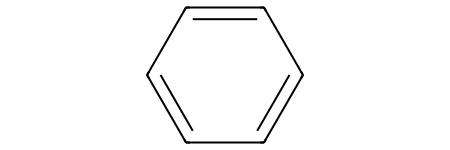

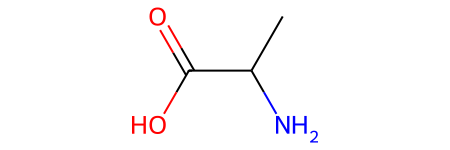

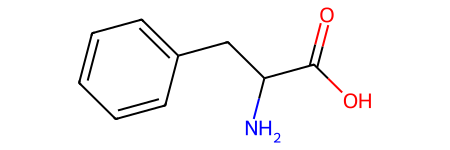

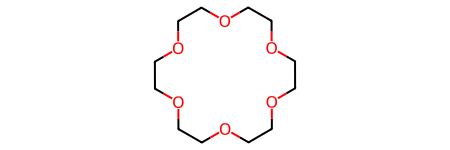

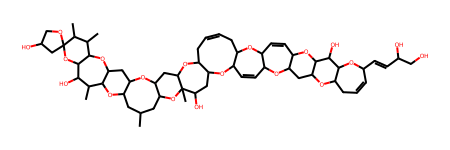

[0.0, 63.31999999999999, 63.31999999999999, 55.38000000000001, 241.36999999999995]


In [15]:
# rdkit内のChemモジュールを読み込む(ここをいったん動かさないと以下のChem.~が動いてくれない)
from rdkit import Chem

# MolFromSmilesで生成した分子を構造式表示するにはdisplayコマンド
benzene = Chem.MolFromSmiles("c1ccccc1")
alanine = Chem.MolFromSmiles('CC(C(=O)O)N')
phenylalanine = Chem.MolFromSmiles('c1ccccc1CC(C(=O)O)N')
crown = Chem.MolFromSmiles('C1COCCOCCOCCOCCOCCO1')
ciguatoxin = Chem.MolFromSmiles('CC1CC2C(CC3C(O2)C(C(C4C(O3)C(C(C5(O4)CC(CO5)O)C)C)O)C)OC6CC7C(C(CC8C(O7)CC=CCC9C(O8)C=CC2C(O9)C=CC3C(O2)CC2C(O3)C(C3C(O2)CC=CC(O3)C=CC(CO)O)O)O)(OC6C1)C')

# CoordGen ライブラリでは大員環化合物を見やすく描画できる
Chem.rdCoordGen.AddCoords(crown)

# TPSA(極性表面積)-細胞膜透過性の指標
from rdkit.Chem import Descriptors
### 分子の用意
mol_list = [benzene,alanine,phenylalanine,crown,ciguatoxin]
writer=Chem.SDWriter('molecules.sdf')
for mol in mol_list:
	writer.write(mol)
writer.close()
suppl = Chem.SDMolSupplier('molecules.sdf')
mols = [x for x in suppl if x is not None]
len(mols) # 2
### TPSAの計算
declist = Descriptors.descList
calc = {}
for (i,j) in declist:
    calc[i] = j
tpsa = [calc['TPSA'](i) for i in mols]
### 描画
display(mol_list[0])
display(mol_list[1])
display(mol_list[2])
display(mol_list[3])
display(mol_list[4])

print(tpsa)
